In [18]:
import numpy as np
from scipy import special
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from scipy.special import erf
import tensorflow as tf
import pandas as pd
import scipy.stats as stats

In [19]:
# Activation functions:

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0.01*x, x)

def leaky_relu(x, alpha=0.01):
    return np.maximum(alpha * x, x)

# Derivatives:

def sigmoid_derivative(x):
    sigmoid_x = sigmoid(x)
    return sigmoid_x * (1 - sigmoid_x)

def tanh_derivative(x):
    return 1 - np.tanh(x) ** 2

def relu_derivative(x):
    return np.where(x > 0, 1, 0.01)

def leaky_relu_derivative(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

In [20]:
import numpy as np
from scipy.special import erf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import time
import matplotlib.pyplot as plt

# 2-D:
import pandas as pd
df = pd.read_csv('C:/Users/basil/Downloads/data_01.csv')

X = df.iloc[:,0:3]
y = df.iloc[:,3:5]

# Start the timer
start_time = time.time()

# Generate data points
X = df.iloc[:,:3]
y = df.iloc[:,3:5]
# Split the data: x,y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state = 301197)

N_train = X_train.shape[0]
N_test = X_test.shape[0]

# Learning rate:
alpha = 0.001

# epochs:
epochs = 500

# Activation function choices:
function = [leaky_relu, leaky_relu, leaky_relu, tanh]
drv_function = [leaky_relu_derivative, leaky_relu_derivative, leaky_relu_derivative, tanh_derivative]
    
# Define the neural network architecture
input_size = 3
hidden_size = [64,32,32]
# List of hidden layer sizes
output_size = 2

# Initialize weights and biases for each layer
np.random.seed(12)
weights = []
biases  = []

# input to hidden layer:
weights.append(0.5 - np.random.rand(hidden_size[0], input_size))
biases.append(np.zeros([hidden_size[0], 1]))
J_001 = np.zeros(epochs) # cost function
    
# Hidden layer:
for i in range(1, len(hidden_size)):
    weights.append(0.5 - np.random.rand(hidden_size[i], hidden_size[i-1]))
    biases.append(np.zeros([hidden_size[i], 1]))
    
# Output layer:
weights.append(0.5 - np.random.rand(output_size, hidden_size[-1]))
biases.append(np.zeros([output_size, 1]))

# Initialize gradients
grad_weights = [np.zeros_like(w) for w in weights]
grad_biases  = [np.zeros_like(b) for b in biases]
 
for ep in range(epochs):
    ransel = np.random.permutation(N_train)
    for i in range(N_train):
        # Forward propagation:
        # select a random without replacement:
        j = ransel[i]
        a = X_train.iloc[j].values.reshape(-1,1)
        activations = [a]
        # Initialize z values
        zs = []
        # Hidden layer loop:
        for k in range(len(hidden_size)):
            z = (weights[k] @ a) + biases[k]
            zs.append(z)
            a = function[k](z)   
            activations.append(a)
        
        # Hidden layer to Output:
        z = (weights[-1] @ a) + biases[-1]
        zs.append(z)
        a = function[-1](z) # output
        activations.append(a)
        
        # Backpropagation:
        delta = (activations[-1] - y_train.iloc[j].values.reshape(-1,1)) * drv_function[-1](zs[-1])
        grad_weights[-1] = np.dot(delta, activations[-2].T)
        grad_biases[-1]  = delta
        
        # Output to hidden layers:
        for k in range(len(hidden_size) - 1, 0, -1):
            z = zs[k]
            delta = np.dot(weights[k+1].T, delta) * drv_function[k](z)
            grad_weights[k] = np.dot(delta, activations[k].T)
            grad_biases[k]  = delta
        
        # Input to Hidden layer:
        z = zs[0]
        delta = np.dot(weights[1].T, delta) * drv_function[0](z)
        grad_weights[0] = np.dot(delta, activations[0].T)
        grad_biases[0]  = delta
        
        # Gradient descent update:
        for k in range(len(hidden_size)+1):
            weights[k] -= alpha * grad_weights[k]
            biases[k]  -= alpha * grad_biases[k]
            
    for j in range(N_train):
        a = X_train.iloc[j].values.reshape(-1,1)
        
        # Hidden layer loop:
        for k in range(len(hidden_size)):
            z = np.dot(weights[k], a) + biases[k]
            a = function[k](z)   
        
        # Hidden layer to Output:
        z = np.dot(weights[-1], a) + biases[-1]
        a = function[-1](z) # output
        denom = 1 / (2 * N_train)
        diff  = y_train.iloc[j].values.reshape(-1,1) - a
        J_001[ep] += denom*((np.linalg.norm(diff,2)**2).sum())

y_pred_001 = np.zeros((N_test, output_size,1))

for k in range(N_test):
    # Forward propagation
    a = X_test.iloc[k].values.reshape(-1, 1)
        
    # Hidden layer loop:
    for l in range(len(hidden_size)):
        z = np.dot(weights[l], a) + biases[l]
        a = function[l](z)   
        
    # Hidden layer to Output:
    z = np.dot(weights[-1], a) + biases[-1]
    y_pred_001[k] = function[-1](z) # output

# Convert y_pred from NumPy array to pandas DataFrame
y_pred_001 = pd.DataFrame(y_pred_001.reshape(N_test, output_size),columns = ['x_c','y_c'])

for i in range(len(X_test)):
    print(f"Test sample {i+1}: Predicted value = {y_pred_001.iloc[i,0]}, True value = {y_test.iloc[i,0]}")

for i in range(len(X_test)):
    print(f"Test sample {i+1}: Predicted value = {y_pred_001.iloc[i,1]}, True value = {y_test.iloc[i,1]}")
    
# End the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print("Elapsed time: ", elapsed_time, " seconds")

Test sample 1: Predicted value = 0.41337002229597264, True value = 0.47384
Test sample 2: Predicted value = 0.3020186064842728, True value = 0.29688
Test sample 3: Predicted value = 0.13285369048237955, True value = 0.26296
Test sample 4: Predicted value = 0.4765692260165959, True value = 0.49308
Test sample 5: Predicted value = 0.36692136399161407, True value = 0.36684
Test sample 6: Predicted value = 0.10242223448461434, True value = 0.08638
Test sample 7: Predicted value = 0.24756784426748435, True value = 0.29425
Test sample 8: Predicted value = 0.39267617108942365, True value = 0.41876
Test sample 9: Predicted value = 0.3427998616758908, True value = 0.33861
Test sample 10: Predicted value = 0.2933485175809007, True value = 0.29865
Test sample 11: Predicted value = 0.3387106597209525, True value = 0.34979
Test sample 12: Predicted value = 0.4611929218321925, True value = 0.45053
Test sample 13: Predicted value = 0.29908493820288906, True value = 0.28624
Test sample 14: Predicted v

In [22]:
import numpy as np
from scipy.special import erf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import time
import matplotlib.pyplot as plt

# 2-D:
import pandas as pd
df = pd.read_csv('C:/Users/basil/Downloads/data_01.csv')

X = df.iloc[:,0:3]
y = df.iloc[:,3:5]

# Start the timer
start_time = time.time()

# Generate data points
X = df.iloc[:,:3]
y = df.iloc[:,3:5]
# Split the data: x,y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state = 301197)

N_train = X_train.shape[0]
N_test = X_test.shape[0]

# Learning rate:
alpha = 0.01

# epochs:
epochs = 500

# Activation function choices:
function = [leaky_relu, leaky_relu, leaky_relu, tanh]
drv_function = [leaky_relu_derivative, leaky_relu_derivative, leaky_relu_derivative, tanh_derivative]
    
# Define the neural network architecture
input_size = 3
hidden_size = [64,32,32]
# List of hidden layer sizes
output_size = 2

# Initialize weights and biases for each layer
np.random.seed(12)
weights = []
biases  = []

# input to hidden layer:
weights.append(0.5 - np.random.rand(hidden_size[0], input_size))
biases.append(np.zeros([hidden_size[0], 1]))
J_01 = np.zeros(epochs) # cost function
    
# Hidden layer:
for i in range(1, len(hidden_size)):
    weights.append(0.5 - np.random.rand(hidden_size[i], hidden_size[i-1]))
    biases.append(np.zeros([hidden_size[i], 1]))
    
# Output layer:
weights.append(0.5 - np.random.rand(output_size, hidden_size[-1]))
biases.append(np.zeros([output_size, 1]))

# Initialize gradients
grad_weights = [np.zeros_like(w) for w in weights]
grad_biases  = [np.zeros_like(b) for b in biases]
 
for ep in range(epochs):
    ransel = np.random.permutation(N_train)
    for i in range(N_train):
        # Forward propagation:
        # select a random without replacement:
        j = ransel[i]
        a = X_train.iloc[j].values.reshape(-1,1)
        activations = [a]
        # Initialize z values
        zs = []
        # Hidden layer loop:
        for k in range(len(hidden_size)):
            z = (weights[k] @ a) + biases[k]
            zs.append(z)
            a = function[k](z)   
            activations.append(a)
        
        # Hidden layer to Output:
        z = (weights[-1] @ a) + biases[-1]
        zs.append(z)
        a = function[-1](z) # output
        activations.append(a)
        
        # Backpropagation:
        delta = (activations[-1] - y_train.iloc[j].values.reshape(-1,1)) * drv_function[-1](zs[-1])
        grad_weights[-1] = np.dot(delta, activations[-2].T)
        grad_biases[-1]  = delta
        
        # Output to hidden layers:
        for k in range(len(hidden_size) - 1, 0, -1):
            z = zs[k]
            delta = np.dot(weights[k+1].T, delta) * drv_function[k](z)
            grad_weights[k] = np.dot(delta, activations[k].T)
            grad_biases[k]  = delta
        
        # Input to Hidden layer:
        z = zs[0]
        delta = np.dot(weights[1].T, delta) * drv_function[0](z)
        grad_weights[0] = np.dot(delta, activations[0].T)
        grad_biases[0]  = delta
        
        # Gradient descent update:
        for k in range(len(hidden_size)+1):
            weights[k] -= alpha * grad_weights[k]
            biases[k]  -= alpha * grad_biases[k]
            
    for j in range(N_train):
        a = X_train.iloc[j].values.reshape(-1,1)
        
        # Hidden layer loop:
        for k in range(len(hidden_size)):
            z = np.dot(weights[k], a) + biases[k]
            a = function[k](z)   
        
        # Hidden layer to Output:
        z = np.dot(weights[-1], a) + biases[-1]
        a = function[-1](z) # output
        denom = 1 / (2 * N_train)
        diff  = y_train.iloc[j].values.reshape(-1,1) - a
        J_01[ep] += denom*((np.linalg.norm(diff,2)**2).sum())

y_pred_01 = np.zeros((N_test, output_size,1))

for k in range(N_test):
    # Forward propagation
    a = X_test.iloc[k].values.reshape(-1, 1)
        
    # Hidden layer loop:
    for l in range(len(hidden_size)):
        z = np.dot(weights[l], a) + biases[l]
        a = function[l](z)   
        
    # Hidden layer to Output:
    z = np.dot(weights[-1], a) + biases[-1]
    y_pred_01[k] = function[-1](z) # output

# Convert y_pred from NumPy array to pandas DataFrame
y_pred_01 = pd.DataFrame(y_pred_01.reshape(N_test, output_size),columns = ['x_c','y_c'])

for i in range(len(X_test)):
    print(f"Test sample {i+1}: Predicted value = {y_pred_01.iloc[i,0]}, True value = {y_test.iloc[i,0]}")

for i in range(len(X_test)):
    print(f"Test sample {i+1}: Predicted value = {y_pred_01.iloc[i,1]}, True value = {y_test.iloc[i,1]}")
    
# End the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print("Elapsed time: ", elapsed_time, " seconds")

Test sample 1: Predicted value = 0.48917878563650624, True value = 0.47384
Test sample 2: Predicted value = 0.2836066828254502, True value = 0.29688
Test sample 3: Predicted value = 0.19845717642360652, True value = 0.26296
Test sample 4: Predicted value = 0.5032613674272006, True value = 0.49308
Test sample 5: Predicted value = 0.3667477288027329, True value = 0.36684
Test sample 6: Predicted value = 0.0940773292681358, True value = 0.08638
Test sample 7: Predicted value = 0.29349381257024587, True value = 0.29425
Test sample 8: Predicted value = 0.4170655605426474, True value = 0.41876
Test sample 9: Predicted value = 0.3394386253048094, True value = 0.33861
Test sample 10: Predicted value = 0.29655069940949885, True value = 0.29865
Test sample 11: Predicted value = 0.33936048753576115, True value = 0.34979
Test sample 12: Predicted value = 0.454931835079168, True value = 0.45053
Test sample 13: Predicted value = 0.2922067798163412, True value = 0.28624
Test sample 14: Predicted valu

In [29]:
import numpy as np
from scipy.special import erf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import time
import matplotlib.pyplot as plt

# 2-D:
import pandas as pd
df = pd.read_csv('C:/Users/basil/Downloads/data_01.csv')

X = df.iloc[:,0:3]
y = df.iloc[:,3:5]

# Start the timer
start_time = time.time()

# Generate data points
X = df.iloc[:,:3]
y = df.iloc[:,3:5]
# Split the data: x,y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state = 301197)

N_train = X_train.shape[0]
N_test = X_test.shape[0]

# Learning rate:
alpha = 0.1

# epochs:
epochs = 500

# Activation function choices:
function = [leaky_relu, leaky_relu, leaky_relu, tanh]
drv_function = [leaky_relu_derivative, leaky_relu_derivative, leaky_relu_derivative, tanh_derivative]
    
# Define the neural network architecture
input_size = 3
hidden_size = [64,32,32]
# List of hidden layer sizes
output_size = 2

# Initialize weights and biases for each layer
np.random.seed(12)
weights = []
biases  = []

# input to hidden layer:
weights.append(0.5 - np.random.rand(hidden_size[0], input_size))
biases.append(np.zeros([hidden_size[0], 1]))
J_1 = np.zeros(epochs) # cost function
    
# Hidden layer:
for i in range(1, len(hidden_size)):
    weights.append(0.5 - np.random.rand(hidden_size[i], hidden_size[i-1]))
    biases.append(np.zeros([hidden_size[i], 1]))
    
# Output layer:
weights.append(0.5 - np.random.rand(output_size, hidden_size[-1]))
biases.append(np.zeros([output_size, 1]))

# Initialize gradients
grad_weights = [np.zeros_like(w) for w in weights]
grad_biases  = [np.zeros_like(b) for b in biases]
 
for ep in range(epochs):
    ransel = np.random.permutation(N_train)
    for i in range(N_train):
        # Forward propagation:
        # select a random without replacement:
        j = ransel[i]
        a = X_train.iloc[j].values.reshape(-1,1)
        activations = [a]
        # Initialize z values
        zs = []
        # Hidden layer loop:
        for k in range(len(hidden_size)):
            z = (weights[k] @ a) + biases[k]
            zs.append(z)
            a = function[k](z)   
            activations.append(a)
        
        # Hidden layer to Output:
        z = (weights[-1] @ a) + biases[-1]
        zs.append(z)
        a = function[-1](z) # output
        activations.append(a)
        
        # Backpropagation:
        delta = (activations[-1] - y_train.iloc[j].values.reshape(-1,1)) * drv_function[-1](zs[-1])
        grad_weights[-1] = np.dot(delta, activations[-2].T)
        grad_biases[-1]  = delta
        
        # Output to hidden layers:
        for k in range(len(hidden_size) - 1, 0, -1):
            z = zs[k]
            delta = np.dot(weights[k+1].T, delta) * drv_function[k](z)
            grad_weights[k] = np.dot(delta, activations[k].T)
            grad_biases[k]  = delta
        
        # Input to Hidden layer:
        z = zs[0]
        delta = np.dot(weights[1].T, delta) * drv_function[0](z)
        grad_weights[0] = np.dot(delta, activations[0].T)
        grad_biases[0]  = delta
        
        # Gradient descent update:
        for k in range(len(hidden_size)+1):
            weights[k] -= alpha * grad_weights[k]
            biases[k]  -= alpha * grad_biases[k]
            
    for j in range(N_train):
        a = X_train.iloc[j].values.reshape(-1,1)
        
        # Hidden layer loop:
        for k in range(len(hidden_size)):
            z = np.dot(weights[k], a) + biases[k]
            a = function[k](z)   
        
        # Hidden layer to Output:
        z = np.dot(weights[-1], a) + biases[-1]
        a = function[-1](z) # output
        denom = 1 / (2 * N_train)
        diff  = y_train.iloc[j].values.reshape(-1,1) - a
        J_1[ep] += denom*((np.linalg.norm(diff,2)**2).sum())

y_pred_1 = np.zeros((N_test, output_size,1))

for k in range(N_test):
    # Forward propagation
    a = X_test.iloc[k].values.reshape(-1, 1)
        
    # Hidden layer loop:
    for l in range(len(hidden_size)):
        z = np.dot(weights[l], a) + biases[l]
        a = function[l](z)   
        
    # Hidden layer to Output:
    z = np.dot(weights[-1], a) + biases[-1]
    y_pred_1[k] = function[-1](z) # output

# Convert y_pred from NumPy array to pandas DataFrame
y_pred_1 = pd.DataFrame(y_pred_1.reshape(N_test, output_size),columns = ['x_c','y_c'])

for i in range(len(X_test)):
    print(f"Test sample {i+1}: Predicted value = {y_pred_1.iloc[i,0]}, True value = {y_test.iloc[i,0]}")

for i in range(len(X_test)):
    print(f"Test sample {i+1}: Predicted value = {y_pred_1.iloc[i,1]}, True value = {y_test.iloc[i,1]}")
    
# End the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print("Elapsed time: ", elapsed_time, " seconds")

Test sample 1: Predicted value = 0.4673918294410895, True value = 0.47384
Test sample 2: Predicted value = 0.295569547447741, True value = 0.29688
Test sample 3: Predicted value = 0.20748625420941927, True value = 0.26296
Test sample 4: Predicted value = 0.4999149981190691, True value = 0.49308
Test sample 5: Predicted value = 0.36966295603835525, True value = 0.36684
Test sample 6: Predicted value = 0.089560873536902, True value = 0.08638
Test sample 7: Predicted value = 0.26907133408509115, True value = 0.29425
Test sample 8: Predicted value = 0.4168234701431268, True value = 0.41876
Test sample 9: Predicted value = 0.3422821867283645, True value = 0.33861
Test sample 10: Predicted value = 0.30387987521028476, True value = 0.29865
Test sample 11: Predicted value = 0.3594642443002429, True value = 0.34979
Test sample 12: Predicted value = 0.4553825417722905, True value = 0.45053
Test sample 13: Predicted value = 0.28293892810470467, True value = 0.28624
Test sample 14: Predicted value

0.0015784475648929392
0.00023913658523018949
0.00016782868474230978


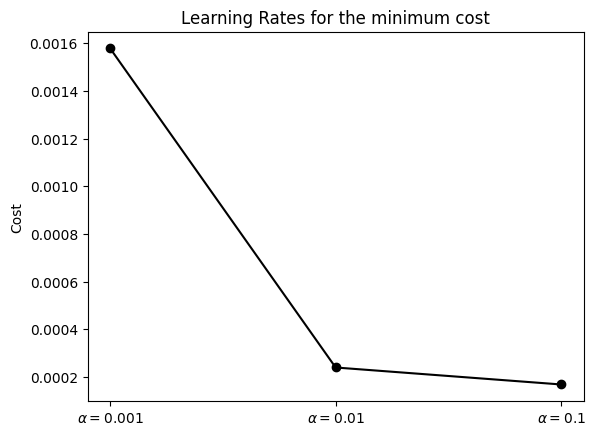

In [23]:
# Graphs for learning rate:
print(np.min(J_001))
print(np.min(J_01))
print(np.min(J_1))

plt.plot([1, 2, 3],[np.min(J_001),np.min(J_01),np.min(J_1)],color = 'black',marker = 'o')
# Add title and labels to the plot
plt.title('Learning Rates for the minimum cost for $\varepsilon = 0.01$')
# Set custom tick labels on the x-axis with LaTeX formatting
plt.xticks([1, 2, 3],[r'$\alpha = 0.001$', r'$\alpha = 0.01$', r'$\alpha = 0.1$'])
plt.ylabel('Cost')
plt.show()

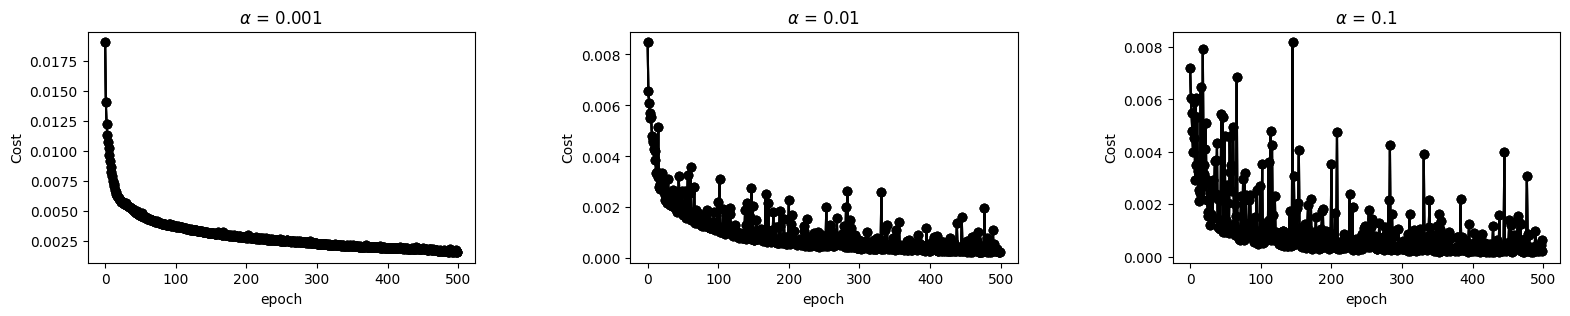

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (19,3))

for ax in enumerate(axes.flatten()):
    axes[0].plot(range(epochs),J_001,color='black',marker = 'o')
    axes[0].set_xlabel("epoch")
    axes[0].set_ylabel('Cost')
    axes[0].set_title(r'$\alpha$ = 0.001')
    
    axes[1].plot(range(epochs),J_01,color='black',marker='o')
    axes[1].set_xlabel("epoch")
    axes[1].set_ylabel('Cost')
    axes[1].set_title(r'$\alpha$ = 0.01')
    
    axes[2].plot(range(epochs),J_1,color='black',marker='o')
    axes[2].set_xlabel("epoch")
    axes[2].set_ylabel('Cost')
    axes[2].set_title(r'$\alpha$ = 0.1')
    
# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4)

In [27]:
print('The mean for a = 0.1 =',format(np.mean(y_pred_1.iloc[0]),".5f"))
print('The mean for a = 0.01 =',format(np.mean(y_pred_01.iloc[0]),".5f"))
print('The mean for a = 0.001 =',format(np.mean(y_pred_001.iloc[0]),".5f"))

print('The variance for a = 0.1 ='  , format(np.var(y_pred_1.iloc[0]),".5f"))
print('The variance for a = 0.01 =' , format(np.var(y_pred_01.iloc[0]),".5f"))
print('The variance for a = 0.001 =', format(np.var(y_pred_001.iloc[0]),".5f"))

The mean for a = 0.1 = 0.24672
The mean for a = 0.01 = 0.26062
The mean for a = 0.001 = 0.18815
The variance for a = 0.1 = 0.04870
The variance for a = 0.01 = 0.05224
The variance for a = 0.001 = 0.05073


In [28]:
print('The mean for a = 0.1 =',format(np.mean(y_pred_1.iloc[1]),".5f"))
print('The mean for a = 0.01 =',format(np.mean(y_pred_01.iloc[1]),".5f"))
print('The mean for a = 0.001 =',format(np.mean(y_pred_001.iloc[1]),".5f"))

print('The variance for a = 0.1 ='  , format(np.var(y_pred_1.iloc[1]),".5f"))
print('The variance for a = 0.01 =' , format(np.var(y_pred_01.iloc[1]),".5f"))
print('The variance for a = 0.001 =', format(np.var(y_pred_001.iloc[1]),".5f"))

The mean for a = 0.1 = 0.21255
The mean for a = 0.01 = 0.20481
The mean for a = 0.001 = 0.22388
The variance for a = 0.1 = 0.00689
The variance for a = 0.01 = 0.00621
The variance for a = 0.001 = 0.00611
